In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [2]:
from bs4 import BeautifulSoup
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [3]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\dell\AppData\Local\Temp/ipykernel_2892/965255522.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame(reviewlist)
df

In [ ]:
df.to_csv("G:\data science_excelr\Assignments\Text Mining/Amazon_Reviews_Oneplus_Nord_CE2.csv")

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string

In [8]:
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,4.0,Average phone.. not very influential,Drawbacks : 1. In-display fingerint is slow as...,Reviewed in India 🇮🇳 on 27 September 2022
1,4.0,Excellent,Design is soo good and camera have to be much ...,Reviewed in India 🇮🇳 on 26 September 2022
2,4.0,Good,All items are there in the box. but I didn't s...,Reviewed in India 🇮🇳 on 23 September 2022
3,4.0,Good enough,Battery life is good and I liked high speed ch...,Reviewed in India 🇮🇳 on 22 September 2022
4,4.0,It's nice compared to other phones at this range.,The dislike part is that sometimes the volume ...,Reviewed in India 🇮🇳 on 20 September 2022
...,...,...,...,...
4995,1.0,Totally waste of money,Only paise khane wala product hai kuch bhi ach...,Reviewed in India 🇮🇳 on 26 April 2022
4996,1.0,After 3 month used display is blinking without...,The media could not be loaded.\n ...,Reviewed in India 🇮🇳 on 17 July 2022
4997,1.0,Worst phone ever.,This phone is not really stand in the line of ...,Reviewed in India 🇮🇳 on 5 March 2022
4998,1.0,Screen not working.,It's just one month and the screen of my nord ...,Reviewed in India 🇮🇳 on 1 June 2022


In [9]:
reviews.Rating.describe()

count    5000.000000
mean        4.053200
std         1.254546
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [12]:
reviews.Rating.describe()

count    5000.000000
mean        4.053200
std         1.254546
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [13]:
data = reviews[['Review']]
data

,Review
0,Drawbacks : 1. In-display fingerint is slow as...
1,Design is soo good and camera have to be much ...
2,All items are there in the box. but I didn't s...
3,Battery life is good and I liked high speed ch...
4,The dislike part is that sometimes the volume ...
...,...
4995,Only paise khane wala product hai kuch bhi ach...
4996,The media could not be loaded.\n ...
4997,This phone is not really stand in the line of ...
4998,It's just one month and the screen of my nord ...


In [14]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

C:\Users\dell\AppData\Local\Temp/ipykernel_8956/1713890637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \


In [15]:
data

,Review
0,drawbacks : 1. in-display fingerint slow compa...
1,design soo good camera much better overall pho...
2,all items box. i swith mobile give someone gif...
3,battery life good i liked high speed charging....
4,the dislike part sometimes volume buttons work.
...,...
4995,only paise khane wala product hai kuch bhi ach...
4996,the media could loaded. this ok
4997,this phone really stand line oneplus series. t...
4998,it's one month screen nord ce 2 working automa...


In [17]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [18]:
data = data['Review'].apply(clean)
data

0       drawbacks   indisplay fingerint slow compared ...
1       design soo good camera much better overall pho...
2       all items box i swith mobile give someone gift...
3       battery life good i liked high speed charging ...
4          the dislike part sometimes volume buttons work
                              ...                        
4995    only paise khane wala product hai kuch bhi ach...
4996                       the media could loaded this ok
4997    this phone really stand line oneplus series th...
4998    its one month screen nord ce  working automati...
4999    phones display camera upto mark ive expected f...
Name: Review, Length: 5000, dtype: object

In [19]:
#Word frequency
freq = pd.Series(' '.join(data).split()).value_counts()[:20] # for top 20
freq

good        2025
phone       1791
camera      1176
battery      913
i            905
quality      800
one          556
mobile       550
nice         447
the          426
product      380
oneplus      356
like         354
price        341
best         340
fast         334
charging     328
plus         317
could        300
nan          300
dtype: int64

In [20]:
import nltk

In [21]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>
[nltk_data] Error loading movie_reviews: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading conll2000: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading brown: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [22]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data = data.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [23]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data).split()).value_counts()[:20] # for top 20
freq_Sw

good        2025
phone       1791
camera      1176
battery      913
quality      800
one          556
mobile       550
nice         447
product      380
oneplus      356
like         354
price        341
best         340
fast         334
charging     328
plus         317
could        300
nan          300
also         299
life         296
dtype: int64

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data)
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [26]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aa,4,0.000090
1,aacha,1,0.000023
2,aaj,1,0.000023
3,aam,1,0.000023
4,aane,1,0.000023
5,aap,5,0.000113
6,aata,1,0.000023
7,aaya,1,0.000023
8,aayega,1,0.000023
9,aayi,2,0.000045


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data)
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [29]:
df

,aap,able,absolutely,accept,accha,according,acha,actually,affordable,agent,...,अम,इल,और,कर,खर,टर,नह,पर,बह,रह
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.213041,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [32]:
top2_words = get_top_n2_words(data, n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,camera quality,365
1,one plus,283
2,battery life,242
3,media could,219
4,could loaded,219


[Text(0, 0, 'camera quality'),
 Text(1, 0, 'one plus'),
 Text(2, 0, 'battery life'),
 Text(3, 0, 'media could'),
 Text(4, 0, 'could loaded'),
 Text(5, 0, 'good phone'),
 Text(6, 0, 'battery backup'),
 Text(7, 0, 'quality good'),
 Text(8, 0, 'fast charging'),
 Text(9, 0, 'good camera'),
 Text(10, 0, 'camera good'),
 Text(11, 0, 'price range'),
 Text(12, 0, 'good battery'),
 Text(13, 0, 'nice phone'),
 Text(14, 0, 'phone good'),
 Text(15, 0, 'good product'),
 Text(16, 0, 'nord ce'),
 Text(17, 0, 'also good'),
 Text(18, 0, 'light weight'),
 Text(19, 0, 'finger print')]

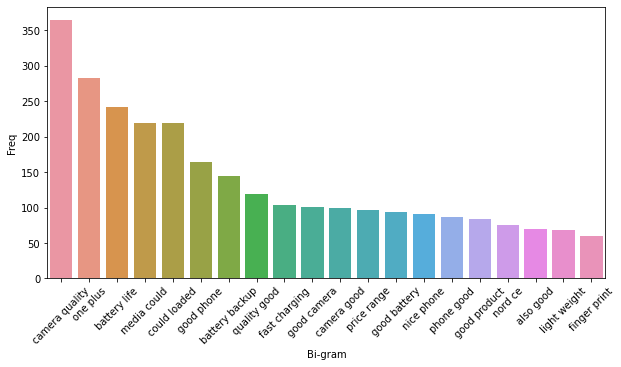

In [33]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [34]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [35]:
top3_words = get_top_n3_words(data, n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [36]:
top3_df

,Tri-gram,Freq
0,media could loaded,219
1,camera quality good,71
2,one plus nord,39
3,battery life good,37
4,good battery life,33
...,...,...
195,finger print working,4
196,battery drains faster,4
197,performance good camera,4
198,camera quality superb,4


[Text(0, 0, 'media could loaded'),
 Text(1, 0, 'camera quality good'),
 Text(2, 0, 'one plus nord'),
 Text(3, 0, 'battery life good'),
 Text(4, 0, 'good battery life'),
 Text(5, 0, 'battery backup good'),
 Text(6, 0, 'good camera quality'),
 Text(7, 0, 'phone price range'),
 Text(8, 0, 'could loaded good'),
 Text(9, 0, 'plus nord ce'),
 Text(10, 0, 'oneplus nord ce'),
 Text(11, 0, 'overall good phone'),
 Text(12, 0, 'camera quality poor'),
 Text(13, 0, 'good battery backup'),
 Text(14, 0, 'good phone price'),
 Text(15, 0, 'could loaded nice'),
 Text(16, 0, 'one plus phone'),
 Text(17, 0, 'camera quality also'),
 Text(18, 0, 'camera quality average'),
 Text(19, 0, 'buy one plus')]

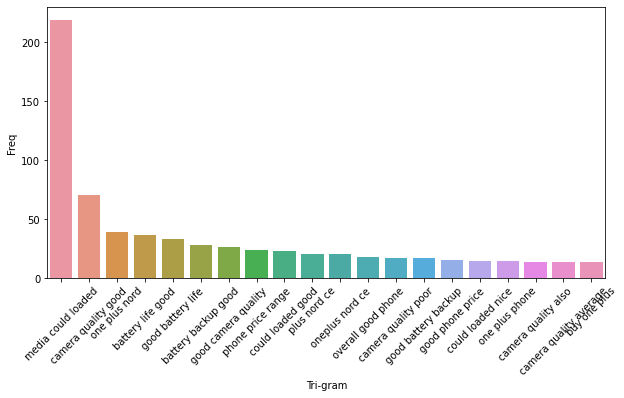

In [37]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [38]:
#world cloud
string_Total = " ".join(data)

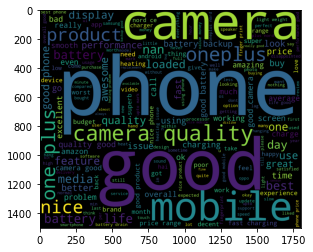

In [39]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
df = pd.read_csv("Amazon_Reviews_Oneplus_Nord_CE2.csv",encoding = "ISO-8859-1")
df

,Unnamed: 0,Rating,Title,Review,Review_Date
0,0,4.0,Average phone.. not very influential,Drawbacks : 1. In-display fingerint is slow as...,Reviewed in India ð®ð³ on 27 September 2022
1,1,4.0,Excellent,Design is soo good and camera have to be much ...,Reviewed in India ð®ð³ on 26 September 2022
2,2,4.0,Good,All items are there in the box. but I didn't s...,Reviewed in India ð®ð³ on 23 September 2022
3,3,4.0,Good enough,Battery life is good and I liked high speed ch...,Reviewed in India ð®ð³ on 22 September 2022
4,4,4.0,It's nice compared to other phones at this range.,The dislike part is that sometimes the volume ...,Reviewed in India ð®ð³ on 20 September 2022
...,...,...,...,...,...
4995,4995,1.0,Totally waste of money,Only paise khane wala product hai kuch bhi ach...,Reviewed in India ð®ð³ on 26 April 2022
4996,4996,1.0,After 3 month used display is blinking without...,The media could not be loaded.\n ...,Reviewed in India ð®ð³ on 17 July 2022
4997,4997,1.0,Worst phone ever.,This phone is not really stand in the line of ...,Reviewed in India ð®ð³ on 5 March 2022
4998,4998,1.0,Screen not working.,It's just one month and the screen of my nord ...,Reviewed in India ð®ð³ on 1 June 2022


In [5]:
data=df[['Review']]
data

,Review
0,Drawbacks : 1. In-display fingerint is slow as...
1,Design is soo good and camera have to be much ...
2,All items are there in the box. but I didn't s...
3,Battery life is good and I liked high speed ch...
4,The dislike part is that sometimes the volume ...
...,...
4995,Only paise khane wala product hai kuch bhi ach...
4996,The media could not be loaded.\n ...
4997,This phone is not really stand in the line of ...
4998,It's just one month and the screen of my nord ...


In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

C:\Users\dell\AppData\Local\Temp/ipykernel_11856/1713890637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \


In [12]:
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import tqdm_notebook
import re
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [13]:
dataframe = pd.DataFrame({"Review": corpus,"Uncleaned_Review": df.Review})
dataframe.head()

,Review,Uncleaned_Review
0,drawback display fingerint slow compared previ...,Drawbacks : 1. In-display fingerint is slow as...
1,design soo good camera much better overall pho...,Design is soo good and camera have to be much ...
2,item box swith mobile give someone gift day re...,All items are there in the box. but I didn't s...
3,battery life good liked high speed charging fa...,Battery life is good and I liked high speed ch...
4,dislike part sometimes volume button work,The dislike part is that sometimes the volume ...


In [17]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
data['tokenized_Review'] = data['Review'].apply(lambda x: nltk.word_tokenize(x))
data

C:\Users\dell\AppData\Local\Temp/ipykernel_11856/641934346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokenized_Review'] = data['Review'].apply(lambda x: nltk.word_tokenize(x))


,Review,tokenized_Review
0,drawbacks : 1. in-display fingerint slow compa...,"[drawbacks, :, 1., in-display, fingerint, slow..."
1,design soo good camera much better overall pho...,"[design, soo, good, camera, much, better, over..."
2,all items box. i swith mobile give someone gif...,"[all, items, box, ., i, swith, mobile, give, s..."
3,battery life good i liked high speed charging....,"[battery, life, good, i, liked, high, speed, c..."
4,the dislike part sometimes volume buttons work.,"[the, dislike, part, sometimes, volume, button..."
...,...,...
4995,only paise khane wala product hai kuch bhi ach...,"[only, paise, khane, wala, product, hai, kuch,..."
4996,the media could loaded. â this ok,"[the, media, could, loaded, ., â, this, ok]"
4997,this phone really stand line oneplus series. t...,"[this, phone, really, stand, line, oneplus, se..."
4998,it's one month screen nord ce 2 working automa...,"[it, 's, one, month, screen, nord, ce, 2, work..."


In [18]:
data.drop(['tokenized_Review'],axis=1,inplace=True)

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
tokenized_Review = data['Review'].apply(lambda x: x.split())
tokenized_Review.head(10)

0    [drawbacks, :, 1., in-display, fingerint, slow...
1    [design, soo, good, camera, much, better, over...
2    [all, items, box., i, swith, mobile, give, som...
3    [battery, life, good, i, liked, high, speed, c...
4    [the, dislike, part, sometimes, volume, button...
5    [nice, mobile., good, performance, one, plus, ...
6    [previously,, i, used, samsung, galaxy, a8, pl...
7    [the, media, could, loaded., â, build, quality...
8                       [camera, good, ,, rest, good.]
9    [good, phone., decent, battery, backup., i, sw...
Name: Review, dtype: object

In [25]:
from nltk.stem import WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

tokenized_Review = tokenized_Review.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_Review.head(10)

[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


0    [drawback, :, 1., in-display, fingerint, slow,...
1    [design, soo, good, camera, much, better, over...
2    [all, item, box., i, swith, mobile, give, some...
3    [battery, life, good, i, liked, high, speed, c...
4    [the, dislike, part, sometimes, volume, button...
5    [nice, mobile., good, performance, one, plus, ...
6    [previously,, i, used, samsung, galaxy, a8, pl...
7    [the, medium, could, loaded., â, build, qualit...
8                       [camera, good, ,, rest, good.]
9    [good, phone., decent, battery, backup., i, sw...
Name: Review, dtype: object

In [29]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments_using_SIA = data.Review.apply(lambda Review: fetch_sentiment_using_SIA(Review))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Review
pos,4358
neg,642


In [34]:
data.Review[3]

'battery life good i liked high speed charging. so far faced heating hanging problem. gestures good. camera features good portrait mode could better also goes fingerprint.'

In [36]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(data.Review[3])

{'neg': 0.075, 'neu': 0.526, 'pos': 0.399, 'compound': 0.8934}

In [38]:
df=pd.DataFrame()
df['Review'] = data.Review
df['scores'] = data['Review'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,drawbacks : 1. in-display fingerint slow compa...,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp..."
1,design soo good camera much better overall pho...,"{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp..."
2,all items box. i swith mobile give someone gif...,"{'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'comp..."
3,battery life good i liked high speed charging....,"{'neg': 0.075, 'neu': 0.526, 'pos': 0.399, 'co..."
4,the dislike part sometimes volume buttons work.,"{'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'comp..."


In [39]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,drawbacks : 1. in-display fingerint slow compa...,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.7430
1,design soo good camera much better overall pho...,"{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp...",0.8720
2,all items box. i swith mobile give someone gif...,"{'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'comp...",-0.4019
3,battery life good i liked high speed charging....,"{'neg': 0.075, 'neu': 0.526, 'pos': 0.399, 'co...",0.8934
4,the dislike part sometimes volume buttons work.,"{'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'comp...",-0.3818


In [40]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,drawbacks : 1. in-display fingerint slow compa...,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.7430,Positive
1,design soo good camera much better overall pho...,"{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp...",0.8720,Positive
2,all items box. i swith mobile give someone gif...,"{'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'comp...",-0.4019,Negative
3,battery life good i liked high speed charging....,"{'neg': 0.075, 'neu': 0.526, 'pos': 0.399, 'co...",0.8934,Positive
4,the dislike part sometimes volume buttons work.,"{'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'comp...",-0.3818,Negative
...,...,...,...,...
4995,only paise khane wala product hai kuch bhi ach...,"{'neg': 0.0, 'neu': 0.952, 'pos': 0.048, 'comp...",0.1779,Positive
4996,the media could loaded. â this ok,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.3612,Positive
4997,this phone really stand line oneplus series. t...,"{'neg': 0.063, 'neu': 0.818, 'pos': 0.119, 'co...",0.3350,Positive
4998,it's one month screen nord ce 2 working automa...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [41]:
data.describe()

,Review,absolute_tidy_Review
count,5000,5000
unique,3791,1
top,nan,Review
freq,300,5000


In [42]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

,sentiment,Review
2,Positive,3218
1,Neutral,1149
0,Negative,633


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compound', ylabel='Density'>

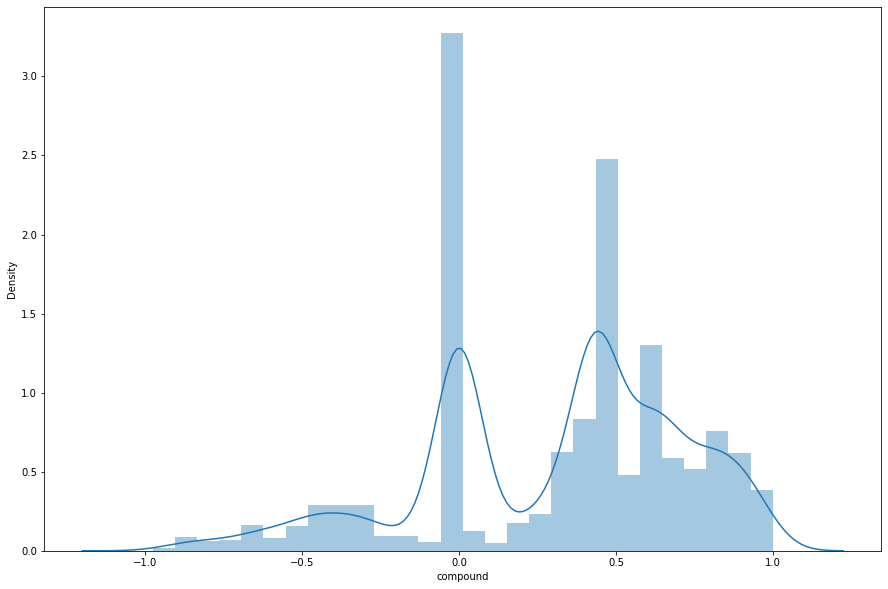

In [43]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

<AxesSubplot:ylabel='compound'>

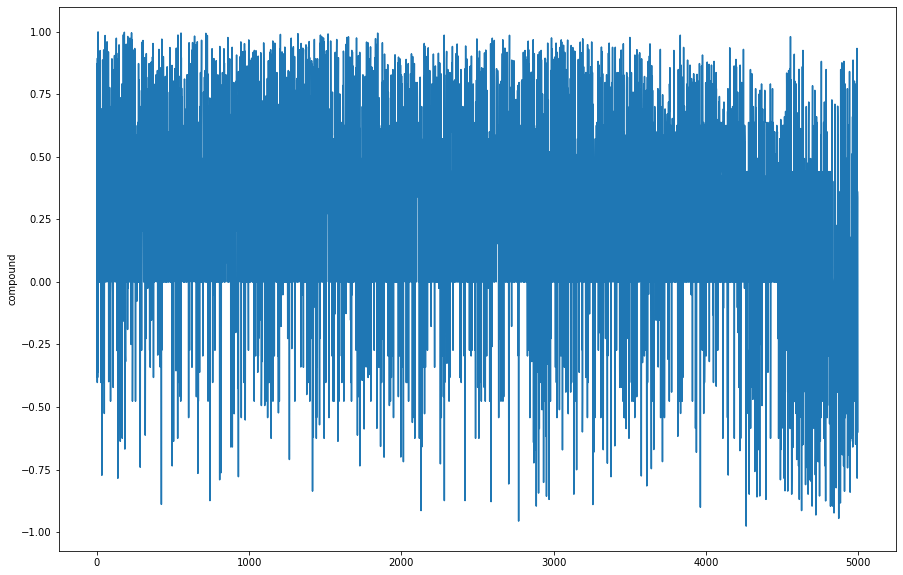

In [44]:
plt.figure(figsize=(15,10))
sns.lineplot(y='compound',x=df.index,data=df)

In [47]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

,Review,word_count
0,drawbacks : 1. in-display fingerint slow compa...,33
1,design soo good camera much better overall pho...,9
2,all items box. i swith mobile give someone gif...,22
3,battery life good i liked high speed charging....,26
4,the dislike part sometimes volume buttons work.,7


<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

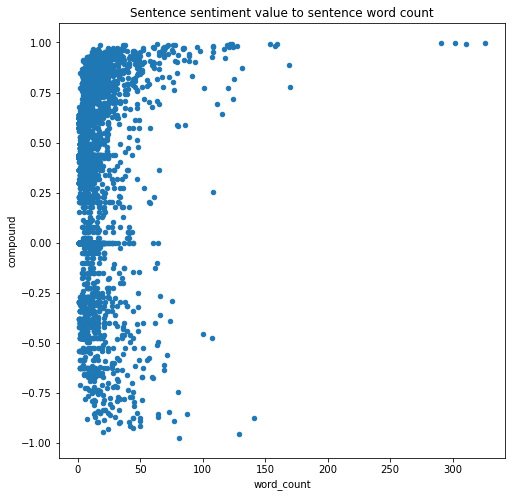

In [48]:
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')